In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fb = pd.DataFrame.from_csv('../data/facebook.csv')
ms = pd.DataFrame.from_csv('../data/microsoft.csv')

## Create a new column in the DataFrame (1) - Price difference

In [5]:
#Create a new column PriceDiff in the DataFrame fb
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']

In [6]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [8]:
#Your turn to create PriceDiff in the DataFrame ms
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']

In [9]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.309997
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.429996
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.680000
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.579998
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,1.360000


In [10]:
#Run this code to display the price difference of Microsoft on 2015-01-05
print(ms['PriceDiff'].loc['2015-01-05'])

-0.68


** Expected Output: ** -0.68

## Create a new column in the DataFrame (2) - Daily return

Daily Return is calcuated as PriceDiff/Close

In [ ]:
#Create a new column Return in the DataFrame fb
fb['Return'] = fb['PriceDiff'] /fb['Close']

In [11]:
#Your turn to create a new column Return in the DataFrame MS
ms['Return'] = ms['PriceDiff'] / ms['Close']

In [13]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return
Date,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.309997,0.006674
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.429996,-0.009196
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.680000,-0.014677
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.579998,0.012705
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,1.360000,0.029418


In [12]:
#Run this code to print the return on 2015-01-05
print(ms['Return'].loc['2015-01-05'])

-0.0146773142811


** Expected Output: ** -0.0146773142811

## Create a new column in the DataFrame using List Comprehension - Direction

In [ ]:
#Create a new column Direction. 
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - fb

fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index ]

In [14]:
# Your turn to create a new column Direction for MS

ms['Direction'] = [1 if ms['PriceDiff'].loc[ei] > 0 else 0 for ei in ms.index]

In [15]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction
Date,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.309997,0.006674,1
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.429996,-0.009196,0
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.680000,-0.014677,0
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.579998,0.012705,1
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,1.360000,0.029418,1


In [16]:
# Run the following code to show the price difference on 2015-01-05
print('Price difference on {} is {}. direction is {}'.format('2015-01-05', ms['PriceDiff'].loc['2015-01-05'], ms['Direction'].loc['2015-01-05']))

Price difference on 2015-01-05 is -0.6799999999999997. direction is 0


** Expected Output: ** Price difference on 2015-01-05 is -0.6799999999999997. direction is 0

## Create a new column in the DataFrame using Rolling Window calculation (.rolling()) - Moving average

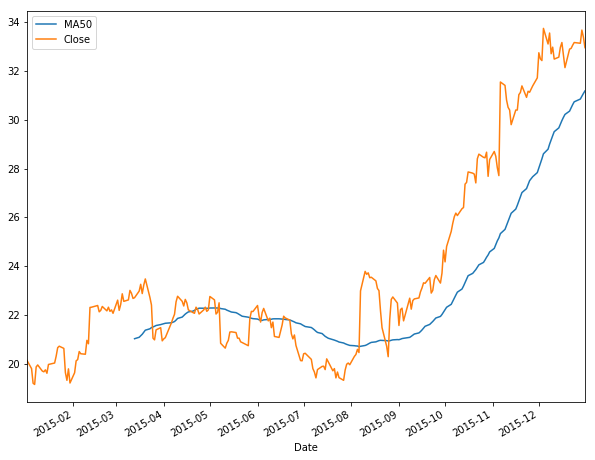

In [18]:
fb['ma50'] = fb['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

In [25]:
fb.iloc[45:-1].head(10)

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,ma50
Date,,,,,,,,
2015-03-09,22.559999,22.780001,22.510000,22.610001,22.028341,5559700,0.389999,NaN
2015-03-10,22.709999,23.150000,22.670000,23.000000,22.408308,13145300,-0.120001,NaN
2015-03-11,23.000000,23.299999,22.820000,22.879999,22.291393,6553000,-0.209999,NaN
2015-03-12,22.660000,22.830000,22.240000,22.670000,22.086800,10174300,0.030001,NaN
2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,0.269998,21.0174
2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,0.280001,21.0758
2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,-0.379999,21.1382
2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,0.349998,21.1998
2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,0.250000,21.2804


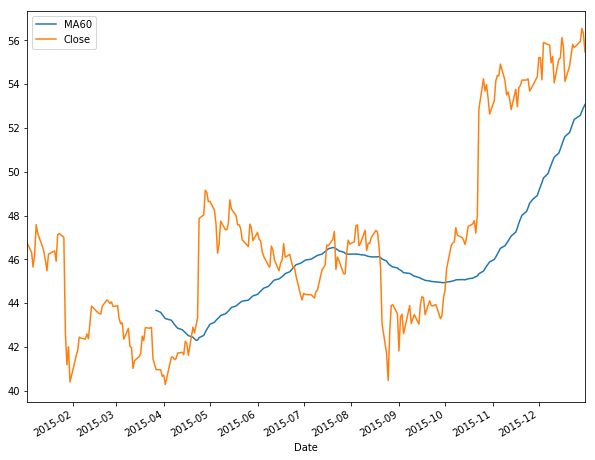

In [21]:
# You can use .rolling() to calculate any numbers of days' Moving Average. This is your turn to calculate "60 days"
# moving average of Microsoft, rename it as "ma60". And follow the codes above in plotting a graph

ms['ma60'] = ms['Close'].rolling(60).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma60'].loc['2015-01-01':'2015-12-31'].plot(label='MA60')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

** Expected Output: **

<img src="MA.png">

In [27]:
ms['MA200'] = ms['Close'].rolling(200).mean()

In [29]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,ma60,MA200
Date,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.309997,0.006674,1,NaN,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.429996,-0.009196,0,NaN,NaN
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.680000,-0.014677,0,NaN,NaN
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.579998,0.012705,1,NaN,NaN
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,1.360000,0.029418,1,NaN,NaN


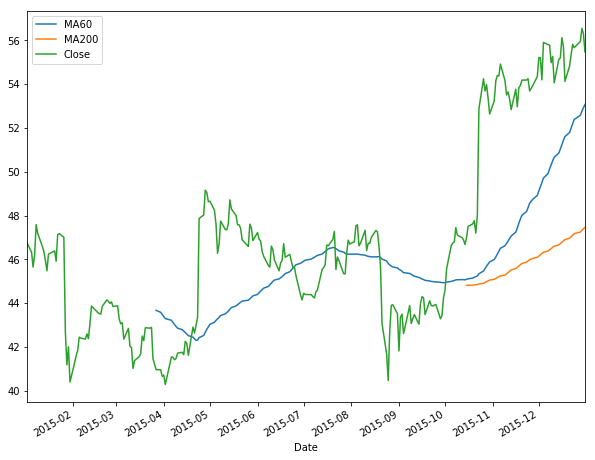

In [31]:
#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma60'].loc['2015-01-01':'2015-12-31'].plot(label='MA60')
ms['MA200'].loc['2015-01-01':'2015-12-31'].plot(label='MA200')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

In [33]:
ms['MA10'] = ms['Close'].rolling(10).mean()
ms['MA20'] = ms['Close'].rolling(20).mean()

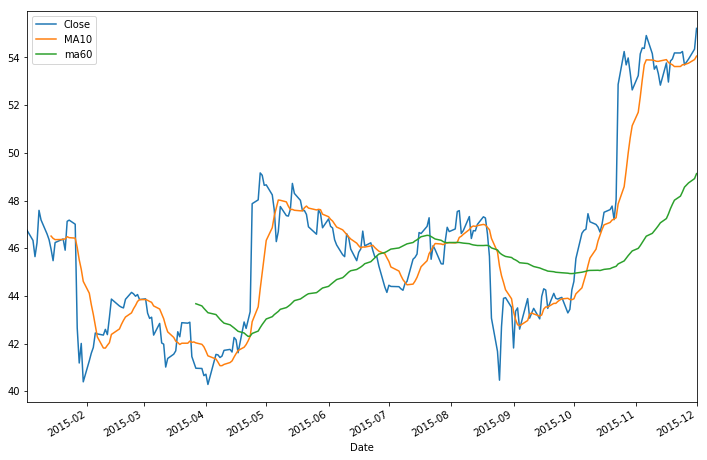

In [48]:
plt.figure(figsize=(12, 8))
ms['Close'].loc['2015-01-01':'2015-12-01'].plot()
ms['MA10'].loc['2015-01-01':'2015-12-01'].plot()
ms['ma60'].loc['2015-01-01':'2015-12-01'].plot()
plt.legend()
plt.show()

In [39]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,ma60,MA200,MA10,MA20
Date,,,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.309997,0.006674,1,NaN,NaN,NaN,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.429996,-0.009196,0,NaN,NaN,NaN,NaN
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.680000,-0.014677,0,NaN,NaN,NaN,NaN
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.579998,0.012705,1,NaN,NaN,NaN,NaN
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,1.360000,0.029418,1,NaN,NaN,NaN,NaN


In [51]:
ms['Shares'] = [1 if ms.loc[p, 'MA10'] > ms.loc[p, 'ma60'] else 0 for p in ms.index]
ms.iloc[40:-1].tail(20)

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,ma60,MA200,MA10,MA20,Shares
Date,,,,,,,,,,,,,,
2018-01-05,87.660004,88.410004,87.430000,88.190002,87.777672,23407100,0.089997,0.001020,1,83.123333,74.49760,86.098,85.6530,1
2018-01-08,88.199997,88.580002,87.599998,88.279999,87.867249,22113000,-0.059998,-0.000680,0,83.321000,74.61465,86.376,85.9425,1
2018-01-09,88.650002,88.730003,87.860001,88.220001,87.807526,19484300,-0.400001,-0.004534,0,83.506000,74.73085,86.647,86.1455,1
2018-01-10,87.860001,88.190002,87.410004,87.820000,87.409393,18652200,0.260002,0.002961,1,83.678167,74.84445,86.889,86.2750,1
2018-01-11,88.129997,88.129997,87.239998,88.080002,87.668182,17808900,1.519996,0.017257,1,83.852000,74.95840,87.126,86.4000,1
2018-01-12,88.669998,89.779999,88.449997,89.599998,89.181076,24271500,-1.250000,-0.013951,0,84.052167,75.07905,87.514,86.6125,1
2018-01-16,90.099998,90.790001,88.010002,88.349998,87.936920,36599700,1.790001,0.020260,1,84.231167,75.19225,87.795,86.7955,1
2018-01-17,89.080002,90.279999,88.750000,90.139999,89.718552,25621200,-0.040001,-0.000444,0,84.435000,75.31365,88.214,86.9600,1
2018-01-18,89.800003,90.669998,89.660004,90.099998,89.678734,24159700,-0.099998,-0.001110,0,84.623167,75.43640,88.589,87.1460,1


In [53]:
ms.loc['2018-01-26', 'MA10']

90.990999600000066

In [55]:
ms['MA10'].loc['2018-01-26']

90.990999600000066

In [57]:
ms['Close1'] = ms['Close'].shift(-1)

In [59]:
ms.head(5)

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,ma60,MA200,MA10,MA20,Shares,Close1
Date,,,,,,,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.309997,0.006674,1,NaN,NaN,NaN,NaN,0,46.759998
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.429996,-0.009196,0,NaN,NaN,NaN,NaN,0,46.330002
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.680000,-0.014677,0,NaN,NaN,NaN,NaN,0,45.650002
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.579998,0.012705,1,NaN,NaN,NaN,NaN,0,46.230000
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,1.360000,0.029418,1,NaN,NaN,NaN,NaN,0,47.590000


In [60]:
ms.iloc[500:500,:]

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,ma60,MA200,MA10,MA20,Shares,Close1
Date,,,,,,,,,,,,,,,


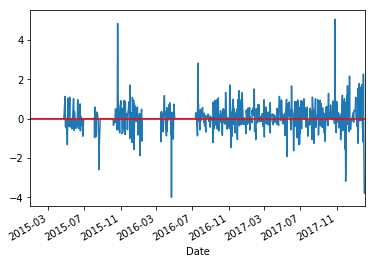

In [64]:
# Manter ou não manter suas ações
ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares'] == 1 else 0 for ei in ms.index]
ms['Profit'].plot()
plt.axhline(y=0, color='red')
plt.show()

In [65]:
ms['welth'] = ms['Profit'].cumsum()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,ma60,MA200,MA10,MA20,Shares,Close1,Profit,welth
Date,,,,,,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,2.270004,0.024477,1,86.110500,76.50885,91.862,89.8285,1,95.010002,2.270004,29.319999
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-0.750000,-0.007894,0,86.293167,76.65650,92.349,90.2815,1,94.260002,-0.750000,28.569999
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,-2.480003,-0.026310,0,86.461833,76.80085,92.765,90.6770,1,91.779999,-2.480003,26.089996
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,-3.779999,-0.041185,0,86.583667,76.93455,92.943,90.9105,1,88.000000,-3.779999,22.309997
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,NaN,NaN,0,86.645833,77.04705,92.582,90.9010,1,NaN,NaN,NaN


Total money you win is 22.309997000000003


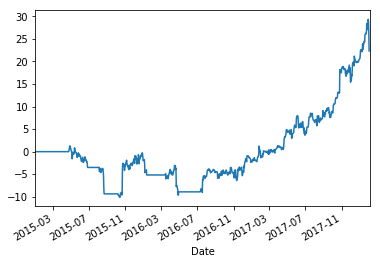

In [68]:
print("Total money you win is {}".format(ms.loc[ms.index[-2], 'welth'])) # Nome correto é wealth

ms['welth'].plot()

In [69]:
print("Total money you spent is ", ms.loc[ms.index[0], 'Close'])

Total money you spent is  46.450001
